# Цель
Проанализировать клиентов регионального банка и выделить портрет клиентов, которые склонны уходить из банка. Это необходимо чтобы воздействовать на сегмент склонных к оттоку и удерживать его, тем самым сохраняя или увеличивая прибыль

# Задачи
+ Провести исследовательский анализ данных
+ Выделить портреты клиентов, которые склонны уходить из банка,
+ Сформулировать и проверить статистические гипотезы о различиях дохода между группами клиентов 

## 1. Обзор данных

### 1.1 Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

### 1.2 Извлечение данных

In [2]:
df = pd.read_csv('bank_dataset.csv')

In [3]:
df.head()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
df.describe()

,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### 1.3 Вывод

#### По результатам превичного обзора данного необходимо:
+ Привести названия полей к единому виду
+ Исследовать природу пропусков в поле баланса клиентов
+ Проверить значения отдельных полей на явные и неявные дубликаты

## 2. Предобработка данных

### 2.1 Приведение названий полей к единому типу

In [6]:
df.columns = df.columns.str.lower()

### 2.2 Анализ пропусков

In [7]:
print('Доля пропусков составляет:',df[df['balance'].isna()]['userid'].count()/df['userid'].count()*100)

Доля пропусков составляет: 36.17


In [8]:
#36% процентов это очень много чтобы удалить строки с пропусками
# Заполнить медианным и средним я не имею право поскольку не имею на это оснований, к тому же это исказит данные
df[df['balance'].isna()]

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,76390.01,0
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15648358,841,Рыбинск,М,28,4,NaN,2,1,1,179436.60,0
9992,15699841,726,Рыбинск,М,36,2,NaN,1,1,0,195192.40,0
9994,15762030,800,Ярославль,Ж,29,2,NaN,2,0,0,167773.55,0
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0


In [9]:
# Более того, выявлено что на отсутствие баланса не влияют ни активность клиента, ни факт оттока
print('Количество записей без баланса у лояльных клиентов',df[(df['balance'].isna()) & (df['loyalty']==1)]['userid'].count())
print('Количество записей без баланса у оставшихся клиентов',df[(df['balance'].isna()) & (df['churn']==0)]['userid'].count())
print('Количество записей без баланса у ушедших клиентов',df[(df['balance'].isna()) & (df['churn']==1)]['userid'].count())
#Вероятно отсутсвие баланса это техническая ошибка системы. При исследовании балансов я не буду учитывать пропуски
# Во всех остальных случаях отсутствие баланса не повлияет на цель исследования

Количество записей без баланса у лояльных клиентов 1873
Количество записей без баланса у оставшихся клиентов 3117
Количество записей без баланса у ушедших клиентов 500


### 2.3 Анализ дубликатов

In [10]:
print('Дубликаты среди всего датафрейма:',df.duplicated().sum())
print('Дубликаты без поля userid:', df.drop('userid', axis=1).duplicated().sum())
#Явных дубликатов нет

Дубликаты среди всего датафрейма: 0
Дубликаты без поля userid: 0


In [11]:
# Поиск неявных дубликатов
print(df['city'].unique())
print(df['gender'].unique())
print(df['products'].unique())
print(df['objects'].unique())
# Неявных дубликатов не обнаружено

['Ярославль' 'Рыбинск' 'Ростов Великий']
['Ж' 'М']
[1 3 2 4]
[ 2  1  8  7  4  6  3 10  5  9  0]


### 2.4 Вывод

#### В рамках предобработки данных было произведено:
+ Приведение полей к единому типу
+ Анализ пропусков и порядок работы с ними
+ Анализ дубликатов среди данных

## 3. Исследовательский анализ данных

### 3.1 Построение распределений

In [12]:
df1 = pd.get_dummies(df)

<AxesSubplot:>

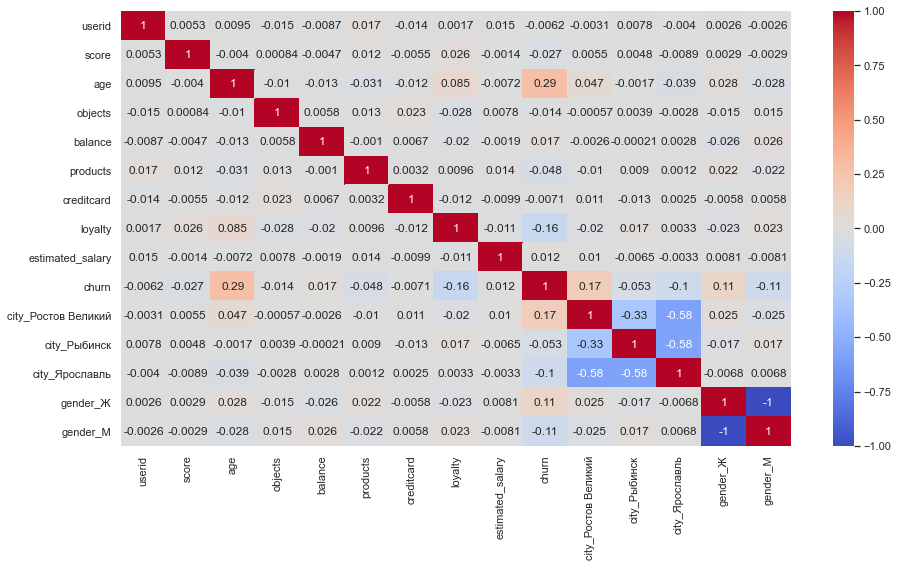

In [13]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df1.corr(), annot = True, cmap = 'coolwarm')


In [14]:
#Попробую выявить какие либо корреляции с ходу
df.corr()
#Относительно выделяющийся показатель кореляции по возрасту и обратно пропорциональный показатель лояльности(ну это логично)
# Также заметна связь оттока с проживанием в Ростове и женским полом

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
userid,1.000000,0.005308,0.009497,-0.014883,-0.008690,0.016972,-0.014025,0.001665,0.015271,-0.006248
score,0.005308,1.000000,-0.003965,0.000842,-0.004744,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009497,-0.003965,1.000000,-0.009997,-0.012822,-0.030680,-0.011721,0.085472,-0.007201,0.285323
objects,-0.014883,0.000842,-0.009997,1.000000,0.005827,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.008690,-0.004744,-0.012822,0.005827,1.000000,-0.001027,0.006721,-0.020418,-0.001856,0.017208
products,0.016972,0.012238,-0.030680,0.013444,-0.001027,1.000000,0.003183,0.009612,0.014204,-0.047820
creditcard,-0.014025,-0.005458,-0.011721,0.022583,0.006721,0.003183,1.000000,-0.011866,-0.009933,-0.007138
loyalty,0.001665,0.025651,0.085472,-0.028362,-0.020418,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,-0.001856,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.006248,-0.027094,0.285323,-0.014001,0.017208,-0.047820,-0.007138,-0.156128,0.012097,1.000000


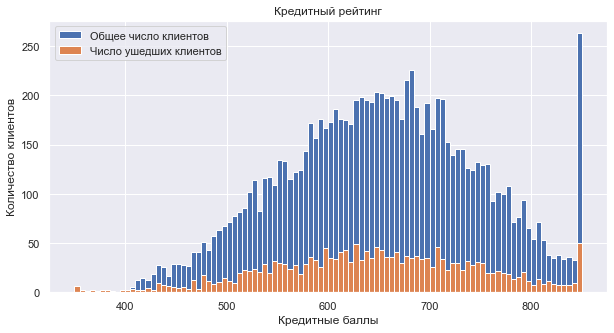

In [15]:
# Анализируем кредитный рейтинг
sns.set(rc = {'figure.figsize':(10,5)})
df['score'].plot( kind='hist', title='Кредитный рейтинг', bins=100)
df[df['churn']==1]['score'].plot(kind='hist', bins=100)
plt.legend(['Общее число клиентов', 'Число ушедших клиентов'])
#Распределение покинувших банк, совпадает с общим распределением клиентов
plt.xlabel("Кредитные баллы")
plt.ylabel("Количество клиентов")
plt.show()

In [16]:
print('Количество людей с очень высоким кредитным рейтингом:',df[df['score']>=800]['userid'].count())
c = round(df[(df['score']>=850) & (df['churn']==1)]['userid'].count()/df[df['score']>=850]['userid'].count()*100,2)
print('Доля людей с самым высоким кредитным рейтингом которые остались в банке', c)

#20% клиентов с высоким рейтингом все равно почему то ушли

Количество людей с очень высоким кредитным рейтингом: 655
Доля людей с самым высоким кредитным рейтингом которые остались в банке 18.45


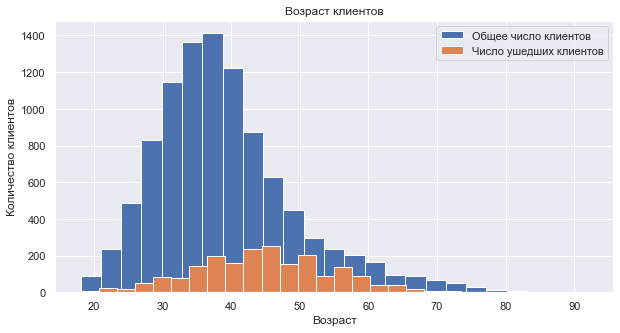

In [17]:
# Анализируем возраст клиентов
df['age'].plot( kind='hist', title='Возраст клиентов', bins=25)
df[df['churn']==1]['age'].plot(kind='hist', title='Возраст клиентов', bins=25)
plt.legend(['Общее число клиентов', 'Число ушедших клиентов'])
plt.xlabel("Возраст")
plt.ylabel("Количество клиентов")
plt.show()

# Не очень информативно, однако можно заметить, что распределение съехало вправо

In [18]:
print('Доля клиентов старше 40, которая покинула банк:', 
      round(df[(df['age']>=40) & (df['churn']==1)]['userid'].count()/df[(df['age']>=40)]['userid'].count()*100),2)
print('Доля клиентов младше 40, которая покинула банк:', 
      round(df[(df['age']<40) & (df['churn']==1)]['userid'].count()/df[(df['age']<40)]['userid'].count()*100,2))
# Разница в 3,5 раза! Нужно что то сделать с этими очередями бабушек в банке!

Доля клиентов старше 40, которая покинула банк: 36 2
Доля клиентов младше 40, которая покинула банк: 9.97


In [19]:
# Анализируем количество продуктов и объектов у клиентов
df.pivot_table(index='objects', values='churn', aggfunc='mean')
# В каждой категории объектов доля оттока клиентов примерно одинакова, тут я зависимости не найду

,churn
objects,
0,0.230024
1,0.224155
2,0.191794
3,0.211100
4,0.205258
5,0.206522
6,0.202689
7,0.172179
8,0.192195


In [20]:
df.pivot_table(index='products', values='churn', aggfunc='mean')
#df[df['churn']==1].pivot_table(index='products', values='churn', aggfunc='count')
#Высокий показатель оттока у клиентов с 3 или 4 продуктами  и наоборот те, у кого 2 продукта уходят реже всего

,churn
products,
1,0.277144
2,0.075817
3,0.827068
4,1.000000


In [21]:
df.pivot_table(index='creditcard', values='churn', aggfunc='mean')
# Наличие кредитной карты не влияет на факт оттока

,churn
creditcard,
0,0.208149
1,0.201843


In [22]:
#Анализируем влияние города и пола
df.pivot_table(index='city', values='churn', aggfunc='mean')

#Доля ушедших в Ростове вдвое больше чем в остальных городах, может имеет смысл провести рекламную кампанию в этом городе


,churn
city,
Ростов Великий,0.324432
Рыбинск,0.166734
Ярославль,0.161548


In [23]:
df.pivot_table(index='gender', values='churn', aggfunc='mean')
# Как это было указано на тепловой карте, женщины более склонны к оттоку, чем мужчины. Из 4 женщин одна уходит

,churn
gender,
Ж,0.250715
М,0.164559


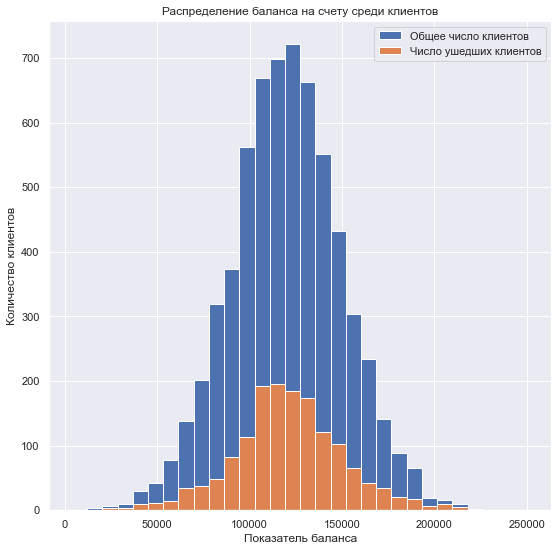

In [24]:
df['balance'].plot(kind='hist', bins=30)
df[df['churn']==1]['balance'].plot(kind='hist', bins=30, figsize=(9,9), title='Анализ балансов клиентов')
plt.legend(['Общее число клиентов', 'Число ушедших клиентов'])
plt.title('Распределение баланса на счету среди клиентов')
plt.xlabel("Показатель баланса")
plt.ylabel("Количество клиентов")
plt.show()
#Анализ балансов не выявил скрытых зависимостей оттока

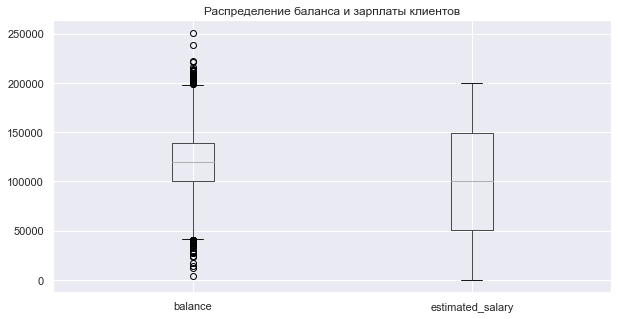

In [25]:
df.boxplot(column=['balance','estimated_salary'])
plt.title('Распределение баланса и зарплаты клиентов')
plt.show()

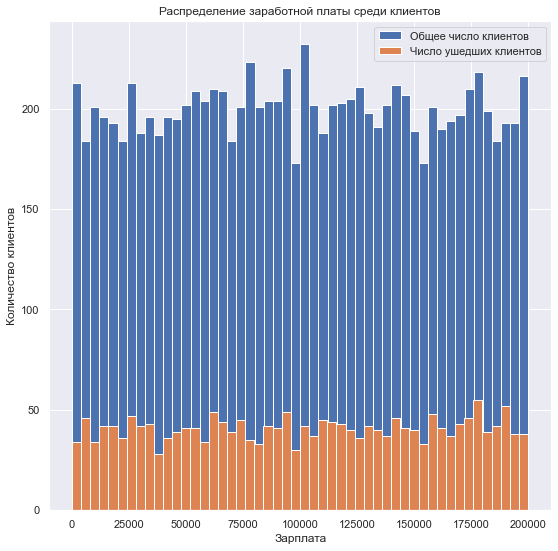

In [26]:
df['estimated_salary'].plot(kind='hist', bins=50)
df[df['churn']==1]['estimated_salary'].plot(kind='hist', bins=50, figsize=(9,9))
plt.legend(['Общее число клиентов', 'Число ушедших клиентов'])
plt.title('Распределение заработной платы среди клиентов')
plt.xlabel("Зарплата")
plt.ylabel("Количество клиентов")
#Распределение дохода также не выявило никаких зависимостей
plt.show()

### 3.2 Составление портретов клиентов, которые склонны уходить из банка

In [27]:
# По итогам исследования выше выявлено что категория клиентов после 40 или с количеством продуктов 
# равным 3 или 4 склонна уходить больше всего


In [28]:
age_run = df[df['age']>40]
pr_run = df[df['products']>=3]

In [29]:
age_run.describe()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,3.581000e+03,3581.000000,3581.000000,3581.000000,2381.000000,3581.000000,3581.000000,3581.000000,3581.000000,3581.000000
mean,1.573410e+07,649.087685,49.870148,4.977381,119438.126459,1.511310,0.694219,0.538956,100449.310821,0.377269
std,7.240635e+04,96.016567,8.668195,2.925861,30030.726602,0.641836,0.460802,0.498550,57378.419003,0.484771
min,1.560845e+07,350.000000,41.000000,0.000000,12459.190000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.567174e+07,584.000000,43.000000,2.000000,99906.890000,1.000000,0.000000,0.000000,51636.700000,0.000000
50%,1.573351e+07,649.000000,47.000000,5.000000,119655.770000,1.000000,1.000000,1.000000,100183.050000,0.000000
75%,1.579662e+07,715.000000,54.000000,8.000000,138778.150000,2.000000,1.000000,1.000000,149756.710000,1.000000
max,1.585836e+07,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [30]:
c = age_run.pivot_table(index='city', values='churn', aggfunc='count').reset_index()
z = df.pivot_table(index='city', values='churn', aggfunc='count').reset_index()
c = c.merge(z, on='city')
c['percent'] = round(c['churn_x']/c['churn_y']*100,2)
c
# Категория клиентов по количеству разбита примерно одинаково по всем городам

,city,churn_x,churn_y,percent
0,Ростов Великий,1034,2509,41.21
1,Рыбинск,882,2477,35.61
2,Ярославль,1665,5014,33.21


#### Перейдем к продуктовым

In [31]:
pr_run.describe()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,3.260000e+02,326.000000,326.000000,326.000000,214.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,1.573768e+07,649.113497,43.653374,5.058282,120074.314953,3.184049,0.708589,0.435583,104400.141503,0.858896
std,7.333764e+04,96.200413,10.148108,2.889713,30697.506247,0.388120,0.455111,0.496595,55759.764947,0.348664
min,1.560905e+07,358.000000,21.000000,0.000000,43772.660000,3.000000,0.000000,0.000000,3440.470000,0.000000
25%,1.567627e+07,587.250000,37.000000,3.000000,102639.192500,3.000000,0.000000,0.000000,64344.800000,1.000000
50%,1.573500e+07,650.000000,43.000000,5.000000,120003.275000,3.000000,1.000000,0.000000,103874.670000,1.000000
75%,1.580044e+07,711.000000,50.000000,8.000000,138941.252500,3.000000,1.000000,1.000000,151150.967500,1.000000
max,1.585823e+07,850.000000,77.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199357.240000,1.000000


In [32]:
c = pr_run.pivot_table(index='city', values='churn', aggfunc='count').reset_index()
z = df.pivot_table(index='city', values='churn', aggfunc='count').reset_index()
c = c.merge(z, on='city')
c['percent'] = round(c['churn_x']/c['churn_y']*100,2)
c
# Категория клиентов по количеству также разбита одинаково по всем городам

,city,churn_x,churn_y,percent
0,Ростов Великий,120,2509,4.78
1,Рыбинск,73,2477,2.95
2,Ярославль,133,5014,2.65


#### Кредитный рейтинг, количество объектов, баланс, зарплата, наличие кредитной карты и лояльность выделенных категорий по статичтическим показателям совпадают с показателями основного датасета (на основании данных функции describe), поэтому не нуждаются в дополнительной проверке на наличие скрытых зависимостей

### 3.3 Вывод
На базе проведенного исследовательского анализа выявлено, что наиболее склонны к оттоку:

+ Клиенты после 40 лет
+ Клиенты, которые имеют 3 или 4 банковских продукта

Подробный анализ категорий этих клиентов показал, что других признаков, которые могут повлиять на факт оттока нет.


- Также установлено, что в Ростове доля оттока клиентов в два раза выше, чем в остальных городах.
- Женщины склонны уходить из банка чаще, чем мужчины

## 4. Статистический анализ данных

### 4.1 Формирование гипотез 

Чтобы проверить данные гипотезы необходимо проверить равенство средних генеральных совокупностей по двум независимым выборкам у которых равны дисперсии. Для анализа возможно использовать t-тест Стьюдента. <br>
В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind <br>
Порог статистической значимости устанавливаемый в 5% является значимым, поэтому я выбираю его<br>



In [33]:
#H0: Доход  ушедших  клиентов равен доходу неушедших клиентов
#H1 Доход  ушедших  клиентов не равен доходу неушедших клиентов

In [34]:
alpha = .05

norun = df.query('churn == 0')
h1_norun = norun['estimated_salary']  

run = df.query('churn == 1')
h1_run = run['estimated_salary']  

h1_results = st.ttest_ind(
    h1_run, 
    h1_norun)

print('p-значение:', h1_results.pvalue)

if (h1_results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу, доходы равны")

p-значение: 0.22644042802223346
Не получилось отвергнуть нулевую гипотезу, доходы равны


#### Это означает, что отток клиентов не зависит от уровня клиентов поскольку средние доходы из каждой выборки равны

Для того чтобы определить природу <b>оттока</b> в городе Ростов Великий необходимо найти причину по которой клиенты уходят. Я считаю, что необходимо проверить гипотезу о том, что доход клиентов в Ростове отличается от других городов и поэтому наш банк не соответсвтует их интересам

In [35]:
#H0: Доход клиентов в Ростове равен доходу клиентов в других городах
#H1: Доход клиентов в Ростове не равен доходу клиентов в других городах

In [36]:
alpha = .05

h1_ro = df.query('city == "Ростов Великий"')
h1_ro = h1_ro['estimated_salary']

h1_oth = df.query('city != "Ростов Великий"')
h1_oth = h1_oth['estimated_salary']  

h1_results = st.ttest_ind(
    h1_ro, 
    h1_oth)

print('p-значение:', h1_results.pvalue)

if (h1_results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу, доходы равны")

p-значение: 0.3031953135186744
Не получилось отвергнуть нулевую гипотезу, доходы равны


#### Это означает, что отток клиентов не зависит от города поскольку средние доходы из каждой выборки равны.

## 5. Общие выводы и рекомендации

### 5.1 Выводы

В рамках данного исследования был произведен анализ клиентов регионального банка. 
По результатам этого анализа решены следующие задачи:
+ Проведение исследовательского анализа данных
+ Выявление категорий клиентов склонных к оттоку:
    1. Клиенты в возрасте старше 40
    2. Клиенты, которые имеют 3 или 4 банковских продукта
+ Сформулированы и проверены статистические гипотезы касательно различий в уровнях дохода у разных категорий клиентов
    1. Доход ушедших клиентов, равен доходу удержанных клиентов 
    2. Доход клиентов в Ростове равен доходу в остальных городах

### 5.2 Рекомендации

#### Для решения проблемы оттока клиентов предлагаю:
1. Сформировать льготные условия обслуживания для людей в возрасте старше 40 
2. Сфокусировать усилия отдела продаж и отдела по работе с клиентами на то, чтобы не предлагать больше 2 продуктов клиенту по причине того, что он может отказаться от наших услуг
3. Пересмотреть политику маркетинга и обслуживания клиентов в Ростове для привлечения большего количества клиентов. Как вариант предложить клиентам в этом городе ипотеку по более низкому проценту
5. Предложить клиентам политику начисления дополнительных процентов по вкладам, если на счету находится более 120 тысяч